# Step1 演習03 NumPyの基礎
---

機械学習では与えられたデータに対してさまざまな演算（数学的な処理）を行います。

また、大量のデータは個々に扱うよりも配列としてまとめて取り扱うと便利です。

そのため、配列を使って数値計算（数学的な処理）が行いやすいと助かります。

NumPyは、まさにそのような目的のために用意されたライブラリです。その便利さを実感してみましょう。

**はじめに**
- for文やwhile文の利用は明示的な利用指示がない場所での使用は避けてください。

**本演習の目的**
- 数値計算ライブラリNumPyを実際に使って試してみる。
- NumPyを使った記述方法を学ぶ。

## ライブラリのインポート

まずはじめに、利用するライブラリのインポートを行います。

- [NumPy](http://www.numpy.org) 数値計算を行うための基本パッケージの公式ドキュメント
- [Matplotlib](http://matplotlib.org) グラフ描画ライブラリの基本パッケージの公式ドキュメント

ドキュメントには有用な情報が書き記されています。何か迷ったときには必ずドキュメントに戻ってくるようにしましょう。

次のセルをそのまま実行（"SHIFT" + "ENTER"）してください。コードが書いてあるセルは**上から順番に**順次実行してください。

** 注意： **初めてmatplotlibを使うユーザーは、フォント一覧のキャッシュが存在しないため、このセルの実行でWarningが出ます。もう一度実行すると、すでにキャッシュができているので、Warningなく走ります。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###  ベクトル演算
機械学習ではベクトル演算を頻繁に利用します。例えば、下記のようにベクトル(1, 2)を３倍するとベクトル(3, 6)になるような演算ができると便利です。

<div align="center"  style="width:100%">
<img src="./dataStep1/vector_operation.png"></div>

ベクトルは数字を並べたものですから、ベクトルを表現するのに配列が使えると便利です。Python標準の配列を使ってベクトル(1, 2)を表現すると次のように記述できるでしょう。

In [2]:
# Python標準の配列
x = [1, 2]

しかし、これを３倍してみてもベクトル(3, 6)にはなりません。

In [3]:
# Python標準の配列を３倍する
x * 3

[1, 2, 1, 2, 1, 2]

NumPyの配列を使ってみましょう。NumPyの配列は　**np.array()**　を使って簡単に作ることができます。<br>
NumPy配列を使ってベクトル(1, 2)を作成し、それを３倍してみましょう。

In [4]:
X = np.array( [1, 2])
X * 3

array([3, 6])

期待通りの結果が得られました。このように、NumPyを利用すると数学的に処理が簡単に行えるので便利です。また、Pythonでは配列の要素数を知るのに、「.size」を使いますが、NumPyの配列はPythonの配列を拡張したものなので、Pythonの配列で利用できるものは基本的にそのまま使えます。

In [5]:
X.size

2

###  行列演算
機械学習では行列演算も頻繁に利用されます。下記のような３行３列（3x3）と３行２列（3x2）の行列積を計算することを考えてみましょう。

<div align="center"  style="width:100%">
<img src="./dataStep1/matrix_product.png"></div>

まず、行列そのものをどのようにPythonで記述するということが問題になりますが、行列も数字を並べたものですからベクトルの時と同じように配列を使うのが自然でしょう。ただし、行列の場合はベクトルと違い、数字を一行並べるだけではダメです。ですから、以下のように配列の中に配列を入れて複数の行を表現します。

In [6]:
A = np.array(
    [[2, -1, 1],
     [1,  0, 2],
     [0,  3, 1]])

B = np.array(
    [[2,  1],
     [1,  0],
     [0, -1]])

行列Aと行列Bの積のことを行列積と呼びます。これは単純な掛け算ではないのは上図からも明らかです。そこで「・」という記号を使って「A・B」と表記します。数学的にこのような表記を用いることから、行列積はドット積とも呼ばれます。NumPyはドット積の演算を行うために、「np.dot()」という関数を用意しているので、これを使って以下のように記述すれば行列Aと行列Bの行列積を計算できます。

In [7]:
# 行列積の計算
np.dot(A, B)

array([[ 3,  1],
       [ 2, -1],
       [ 3, -1]])

これは下記のように記述することも可能です（どちらの表記を使うかは好みの問題です）。

In [8]:
# 行列積の計算：np.dot(A, B)と同じ
A.dot(B)

array([[ 3,  1],
       [ 2, -1],
       [ 3, -1]])

掛け算は順序を入れ替えても同じ答えになります。つまり「a x b = b x a」です。行列の場合は、「A・B」と「B・A」は同じになるでしょうか？確認してみましょう。

In [9]:
np.dot(B, A)

ValueError: shapes (3,2) and (3,3) not aligned: 2 (dim 1) != 3 (dim 0)

一般に、「A・B」と「B・A」は等しくなりません。この例では、同じになるどころかエラーになってしまい計算すらできません。なぜなら、「B・A」の場合は、左側が「3x2」の行列、右側が「3x3」の行列になるので、内側の数字が「2」と「3」となり一致していないからです。

#### 転置行列
行列の行と列を入れ替えたも（ひっくり返したもの）行列を、その行列の転置行列（Transverse Matrix）と呼びます。


<div align="center"  style="width:100%">
<img src="./dataStep1/transverse_matrix.png"></div>

NumPy配列を用いて表現された行列は、その行列の最後に「.T」を付ければ、その行列の逆行列を作れます。行列Bの逆行列Cを作ってみましょう。

In [10]:
# 行列Bの逆行列
C = B.T
print(C)

[[ 2  1  0]
 [ 1  0 -1]]


行列の形を確認するには、その行列の最後に「.shape」を付ければ確認できます。

In [11]:
# 行列Cの形（シェイプ）を確認
C.shape

(2, 3)

行列Cは２行３列（2x3）のシェイプであることが確認できます。行列Cと行列Aの行列積「C・A」は計算できるでしょうか？行列Cは2x3、行列Aは3x3なので、内側の数字が一致しているので計算できます。

<div align="center"  style="width:100%">
<img src="./dataStep1/dot_product.png"></div>

実際に行列積「C・A」が計算できることを書きで確認してみましょう。

In [12]:
np.dot(C, A)

array([[ 5, -2,  4],
       [ 2, -4,  0]])

## 応用編：行列積を使って直線を描いてみよう

### ブロードキャスト
NumPyの配列を使った演算では、配列の大きさが合わない場合に自動的に配列が大きい方に合わせて計算してくれる「ブロードキャスト」という機能があり、このおかげで数式を直感的に記述できます。

<div align="center"  style="width:100%">
<img src="./dataStep1/line_broadcast.png"></div>


この機能を使って実際に直線上の点をプロットしてみましょう。

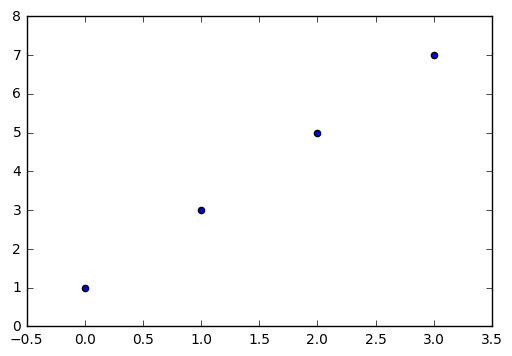

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# x軸（xベクトル）
x=np.array([0, 1, 2, 3])

a = 2 # 傾きa
b = 1 # y切片b

y = a*x + b # 直線の式（直感的に記述できる！）

plt.scatter(x, y) # (x, y)の位置にプロットする

### 行列積を用いて直線上の点を表現する

まず、下記の行列演算が可能であることを確認しましょう。「1x2の行列」と「2x1の行列」の行列積は、内側の数が両方とも同じ「2」なので計算できます。


<div align="center"  style="width:100%">
<img src="./dataStep1/simple_matrix.png"></div>

実際に演算できることを確認しましょう。

In [14]:
D = np.array([5, 2])
E = np.array([1, 3])

F = np.dot(D, E)
print(F)

11


しっかり確認できたでしょうか。ここからが応用編の本番です。注意深く以下の議論を追いかけてください。上記の行列演算が可能だということは、行列が下記のようになっていると「直線 y = ax + b」の各点が行列積で表現できることが理解できるでしょう。

<div align="center"  style="width:100%">
<img src="./dataStep1/line_with_matrix.png"></div>

たとえば、「x = 0」の時の y の値は下記のように計算できます。「y = 2・0 + 1 = 1」になることを確認してください。

In [15]:
# 「x = 0」の時のyの値を計算するため、xの値の前に1を付けた行列を用意する
X = np.array([1, 0])

a = 2 # 傾きa
b = 1 # y切片b
theta = np.array([b, a])

y = np.dot(X, theta)

print(y)

1


同様に、「x = 1」の時の y の値は下記のように計算できます。「y = 2・1 + 1 = 3」になることを確認してください。

In [16]:
# 「x = 1」の時のyの値を計算するため、xの値の前に1を付けた行列を用意する
X = np.array([1, 1])

a = 2 # 傾きa
b = 1 # y切片b
theta = np.array([b, a])

y = np.dot(X, theta)

print(y)

3


これで行列積を用いて y の値が計算できることは確認できたと思います。しかしながら、ベクトルxの要素一つ一つに対応するyの値を個別に計算していては大変です。下記のようにすれば、yの値をまとめて計算できるので便利です。ここでのポイントは、与えられているベクトルxの各要素の前に「1」を付けた行列Xを用意することです。

<div align="center"  style="width:100%">
<img src="./dataStep1/line_all_with_matrix.png"></div>

以下のセルを実行し、行列積を用いて「直線 y = a*x + b」上の各点がすべて一度に求められることを確認しましょう。

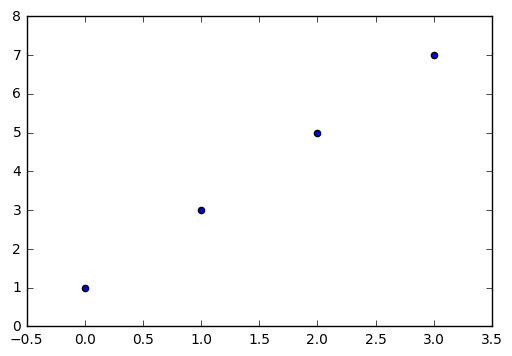

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# x軸（xベクトル）
x = np.array([0, 1, 2, 3])

a = 2 # 傾きa
b = 1 # y切片b

# xの要素の先頭に1を追加
X = np.array([[1, 0],
              [1, 1],
              [1, 2],
              [1, 3]])

theta = np.array([b, a])
y = np.dot(X, theta)

plt.scatter(x, y) # (x, y)の位置にプロットする

### ベクトル x の要素数を増やして直線をプロットしてみよう

上記のコードでは、ベクトル x の各要素の先頭に1を追加することで配列Xを用意しました。しかし、ベクトル x の要素数が100個も1000個もあったら、このようなやり方で1を直接追加するのは大変です。そこで、必要なだけ１を用意して、それをペタリとベクトル x　にくっ付けることができたら便利です。必要なだけ１を用意するには「np.ones([a, b])」を使うことができます。この関数は要素が全て1のa行b列の行列を生成します。また、2つの行列Aと行列Bをペタリとくっ付ける処理には「np.c_[A, B]」が使えます。下記のセルを実行すると、上記のコードで直接手書きで用意した行列Xが生成されることを確認してください。

In [18]:
# x軸（xベクトル）
x = np.array([0, 1, 2, 3])

# Xの1列目にズラッと1を並べる。np.c_[]はcolumn方向に連結
X = np.c_[np.ones([4,1]), x] 

print(X)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]]


ベクトル x を0から100まで間隔1で用意したい場合（つまり、0, 1, 2, 3, ..., 100）、「関数np.arange(a, b, c)」 が利用できます。「関数np.arange(a, b, c)」はaからbまで（ただしbは含まない）範囲で、間隔cで数値を配列を生成します。ここでは、0から100まで間隔1で数値を用意したいのですから下記のようにします。

In [19]:
np.arange(0, 101, 1)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

上記で学んだことをすべて用い、行列積を使って「直線 y = ax + b」をプロットするコードを自力で作ってみましょう。

解答例は下記の通りです。

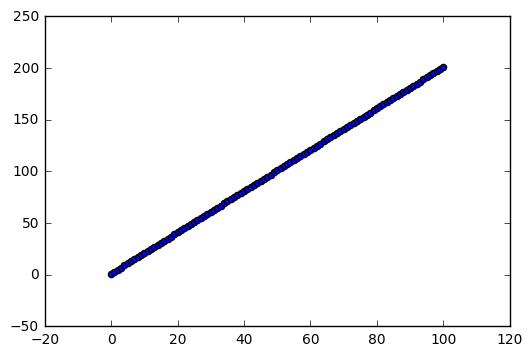

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# x軸（xベクトル）
x = np.arange(0, 101, 1)
m = x.size # xの要素数（サイズ）

# Xの1列目にズラッと1を並べる
X = np.c_[np.ones([m,1]), x] 

a = 2 # 傾きa
b = 1 # y切片b

theta = np.array([b, a])
y = np.dot(X, theta)

plt.scatter(x, y) # (x, y)の位置にプロットする